<a href="https://colab.research.google.com/github/utopickaiser/AI-Homework/blob/main/AI_Exercise_W5_Fuzzy_Controller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=05adc19b23e5fe8afff7b219fb91863e86b79078d9e64d51442186acda330af1
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


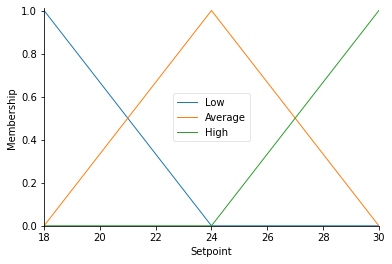

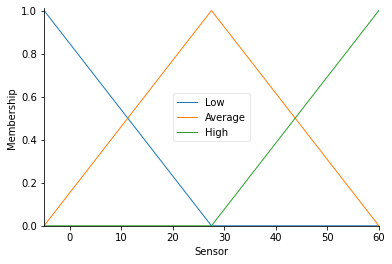

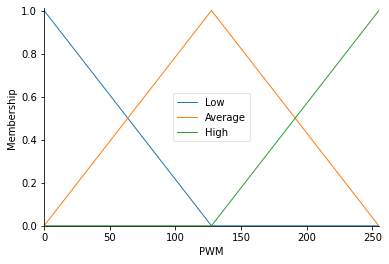

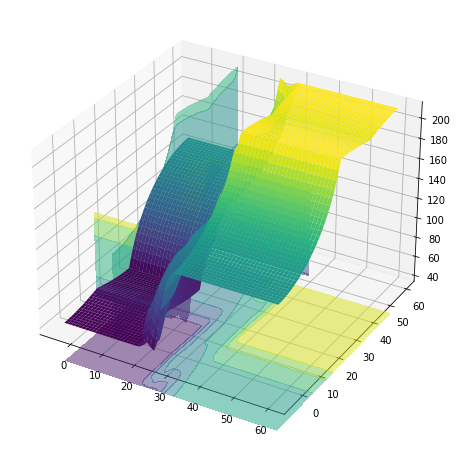

In [5]:
# Temperature control DC motor
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
universe = np.linspace(18,30,61)
universe1 = np.linspace(-5,60,61)
universe2 = np.linspace(0,255,61)
sp = ctrl.Antecedent(universe, 'Setpoint')
se = ctrl.Antecedent(universe1, 'Sensor')
pwm = ctrl.Consequent(universe2,'PWM')
item1 = ['Low' , 'Average', 'High']
sp.automf(names = item1)
se.automf(names = item1)
pwm.automf(names = item1)
sp.view()
se.view()
pwm.view()
rule0 = ctrl.Rule(antecedent = (sp['Low'] & se['Low'])|
                  (sp['Low'] & se['Average'])|(sp['Average'] & se['Low']),
                   consequent = pwm['Low'], label = 'Rule Low')

rule1 = ctrl.Rule(antecedent = (sp['Average'] & se['Average'])|
                  (sp['High'] & se['Low'])|(sp['Low'] & se['High']),
                   consequent = pwm['Average'], label = 'Rule Average')

rule2 = ctrl.Rule(antecedent = (sp['High'] & se['High'])|
                  (sp['High'] & se['Average'])|(sp['Average'] & se['High']),
                   consequent = pwm['High'], label = 'Rule High')

system = ctrl.ControlSystem(rules = [rule0,rule1,rule2])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(-5,60,61)
x,y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(61):
  for j in range(61):
    for k in range(61):
      sim.input['Setpoint'] = x[i,j]
      sim.input['Sensor'] = y[i,j]
      sim.compute()
      z[i,j] = sim.output['PWM']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z, zdir = 'z', offset = 3, cmap = 'viridis', alpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', alpha = 0.5 )
cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', alpha = 0.5 )
ax.view_init(30,300)
